# Problem Statement

> Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

- As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.
- With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. 
- Tasked with building a forecasting model to forecast the daily sales for the next six weeks. 
- To help , historial sales data has been provided for 1,115 Rossmann stores.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")
print("Shape of train dataset:", train.shape)
print("Shape of store dataset:", store.shape)

In [4]:
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


> No objects/entries missing in the train dataset. Hence no imputation of the data set is required.

In [6]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
(store.isnull().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

> Absence of promo entries indicate that there were no promos being run.

In [9]:
store.loc[store['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = dt.datetime.now().isocalendar()[1]
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna(0, inplace=True)


#### The column CompetitionDistance describes thedistance in meters to the nearest competitor store, so in theory the null values present in the column can be replaced by the mean of the column, as the distance being filled would be for the nearest competition. so therefore as we can see that CompetitionDistance field has insignificant no. of null values, we will impute it with its mean.


In [10]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)


# Box plot and outlier analysis on datasets


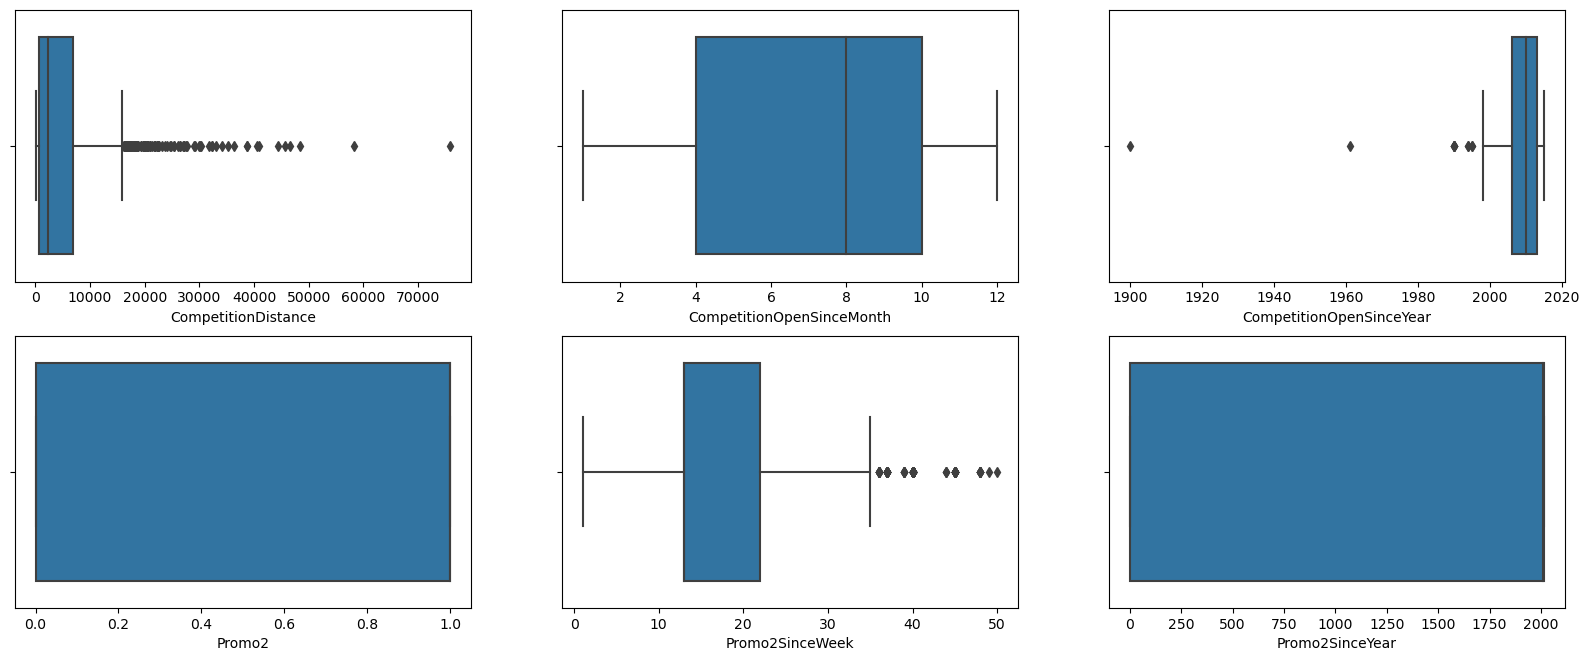

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'CompetitionDistance', data = store, whis=1.5)
plt.subplot(3,3,2)
sns.boxplot(x = 'CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x = 'CompetitionOpenSinceYear',data = store, whis=1.5)
plt.subplot(3,3,4)
sns.boxplot(x = 'Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x = 'Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

In [12]:
store.Promo2SinceYear.unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [13]:
def CountPlot(features,df):
    cols=4
    rows = 2
    fig = plt.figure(figsize=(16, 10))
    for plot, feature in enumerate(features):
        fig.add_subplot(rows,cols,plot+1)
        fig.tight_layout(h_pad=5, w_pad=2)
        ax = sns.countplot(x=feature, data=df,order = df[feature].value_counts().index)
        plt.xticks(rotation = 60)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(df) * 100),
                    ha="center")

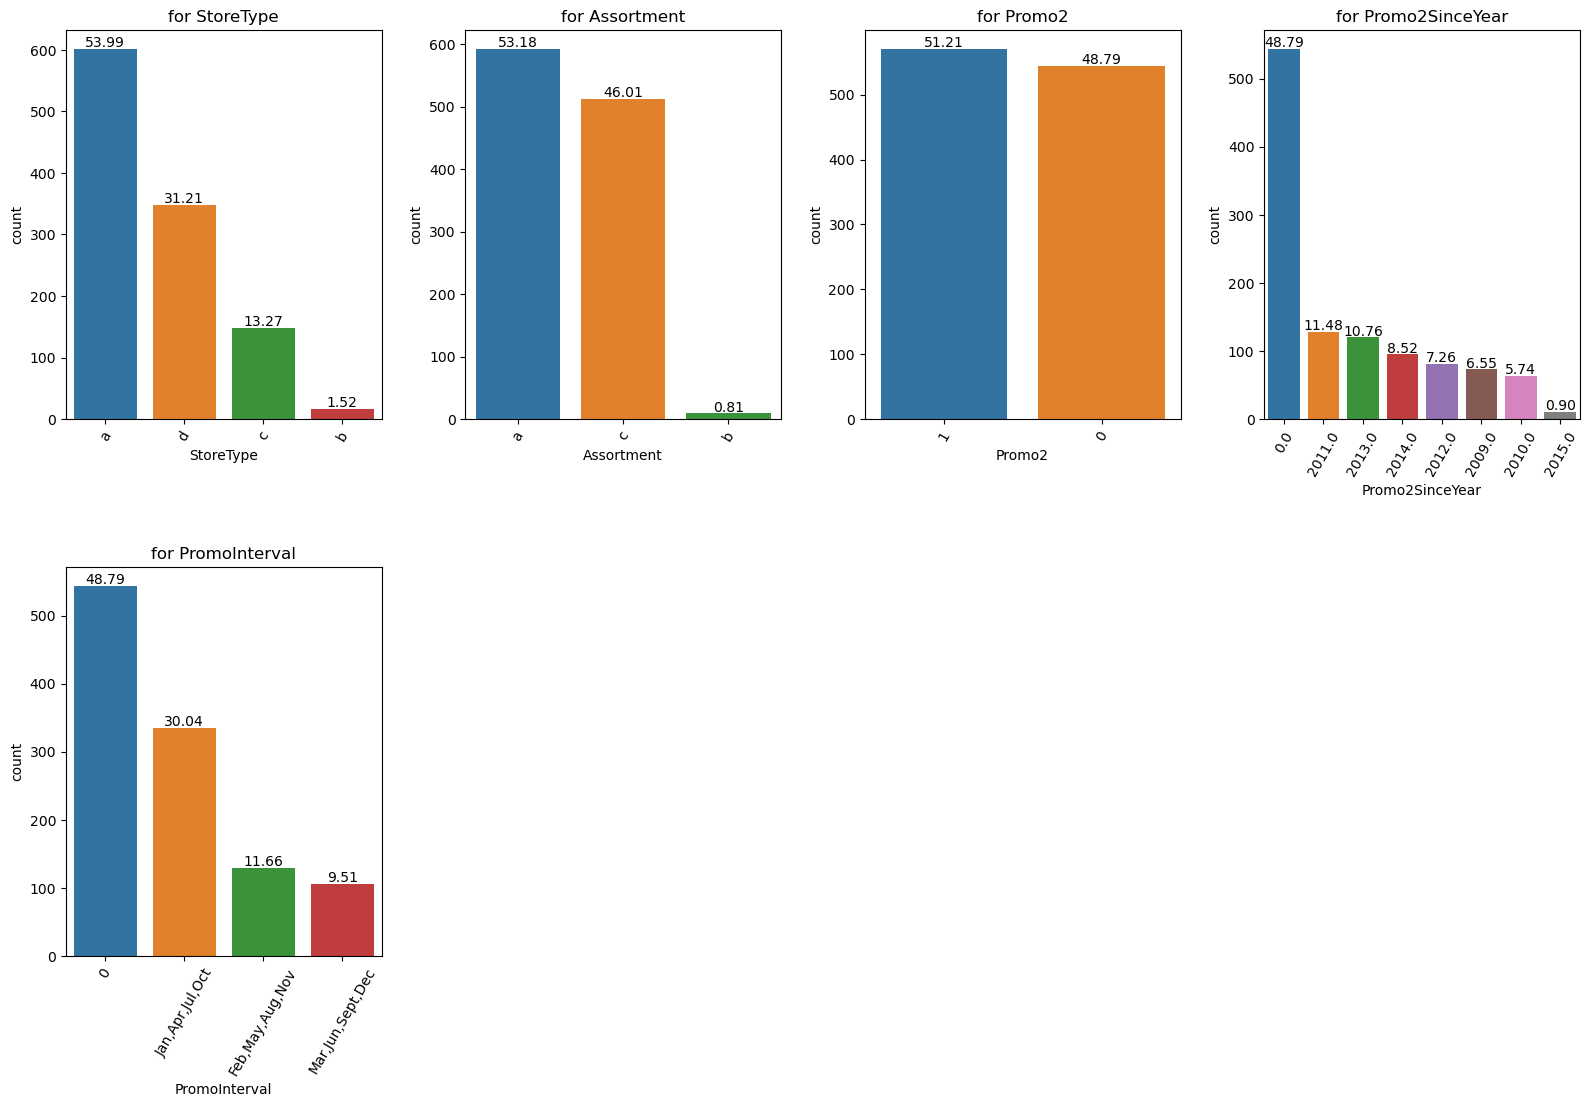

In [14]:
store_categorical_fields=['StoreType','Assortment','Promo2','Promo2SinceYear','PromoInterval']
CountPlot(store_categorical_fields,store)


Inferences on store data :-
- Majority of the stores, almost 54% are type A stores.
- Majority of the stores have type A of the assortments, other type of assortments are low.
- 48% of the stores do not have promotions; Promo2 in the store.
- Promotions are concentrated in months of Jan, Apr, Jul, Oct months.


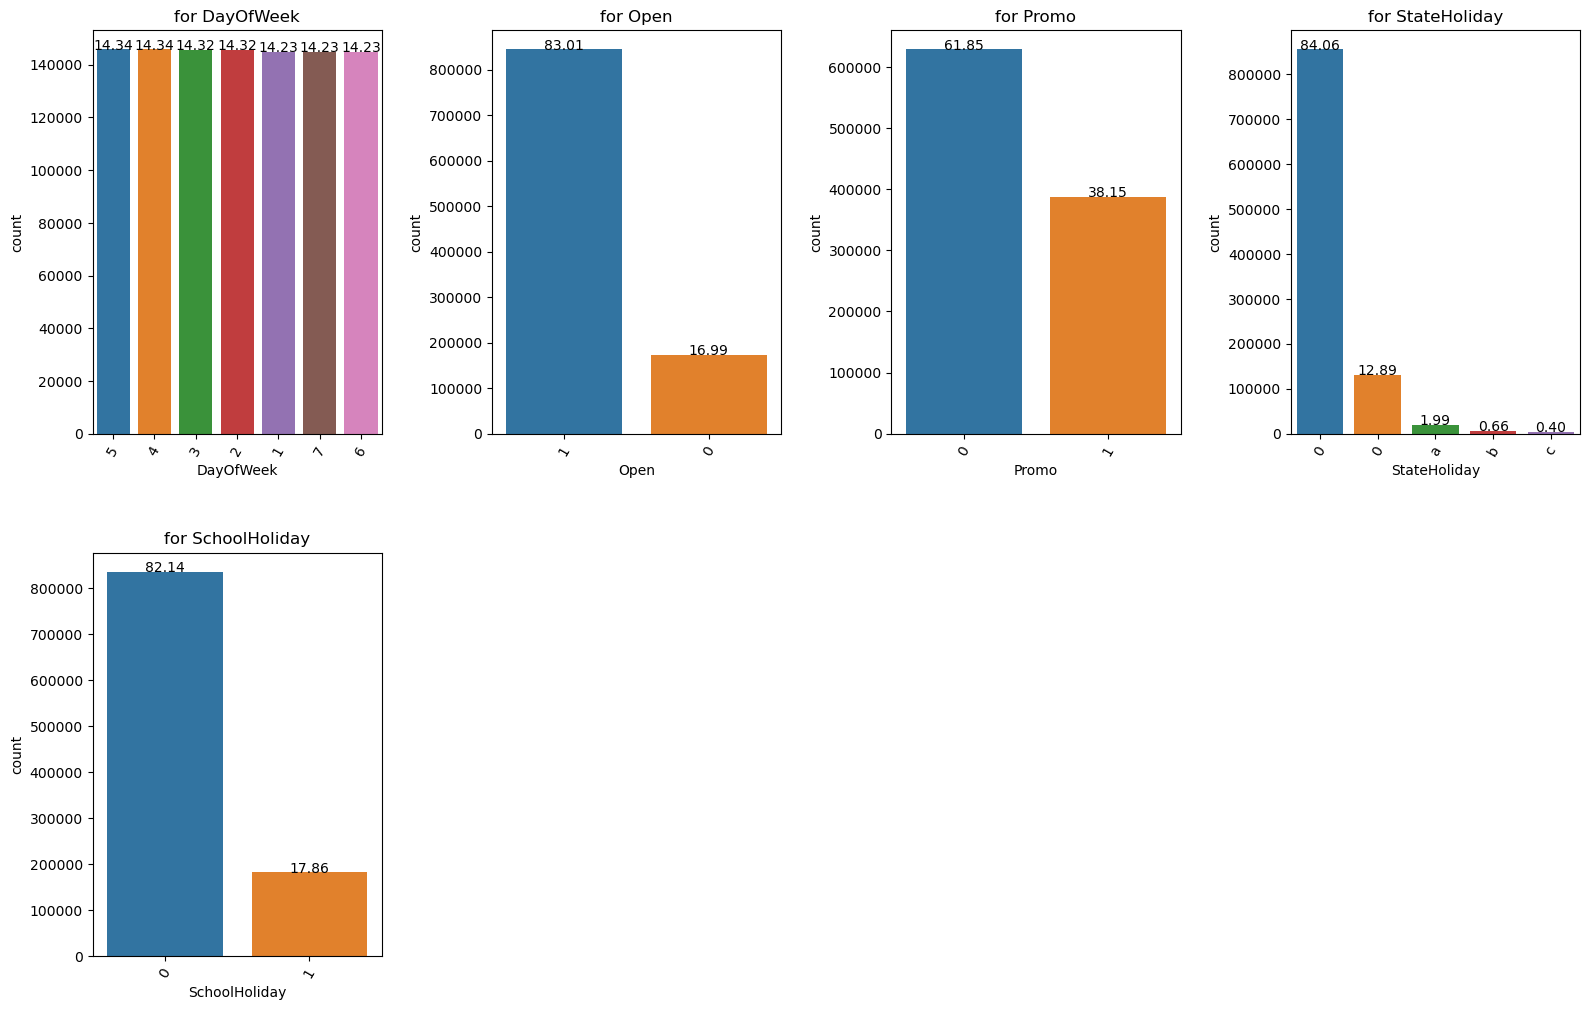

In [15]:
train_categorical_fields=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
CountPlot(train_categorical_fields,train)


Inferences on train data: -
- All days of the week have equal contribution.
- Stores are closed on only 17% data points.
- Promotions are active on only 38% records.

In [16]:
# Number of transactions per day in closed/open stores
closed_train_df = train[train['Open'] == 0]
open_train_df = train[train['Open'] == 1]
print('Total = ', len(train))
print('number of stores/day closed = ', len(closed_train_df))
print('number of stores/day open = ', len(open_train_df))

Total =  1017209
number of stores/day closed =  172817
number of stores/day open =  844392


In [17]:
len(closed_train_df) / len(store)

154.99282511210762

## We are going to apply a filter so that we only have data from stores on open days, as it makes no sense to use data from when stores are closed, since there are no sales on those days, in addition to messing up the data statistics.

In [18]:
train = train[train['Open'] == 1]
train.shape

(844392, 9)

In [19]:
train.drop(['Open'], axis = 1, inplace = True)
train.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [20]:
train.describe()

Store      DayOfWeek          Sales      Customers  \
count  844392.000000  844392.000000  844392.000000  844392.000000   
mean      558.422920       3.520361    6955.514291     762.728395   
std       321.731914       1.723689    3104.214680     401.227674   
min         1.000000       1.000000       0.000000       0.000000   
25%       280.000000       2.000000    4859.000000     519.000000   
50%       558.000000       3.000000    6369.000000     676.000000   
75%       837.000000       5.000000    8360.000000     893.000000   
max      1115.000000       7.000000   41551.000000    7388.000000   

               Promo  SchoolHoliday  
count  844392.000000  844392.000000  
mean        0.446352       0.193580  
std         0.497114       0.395103  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

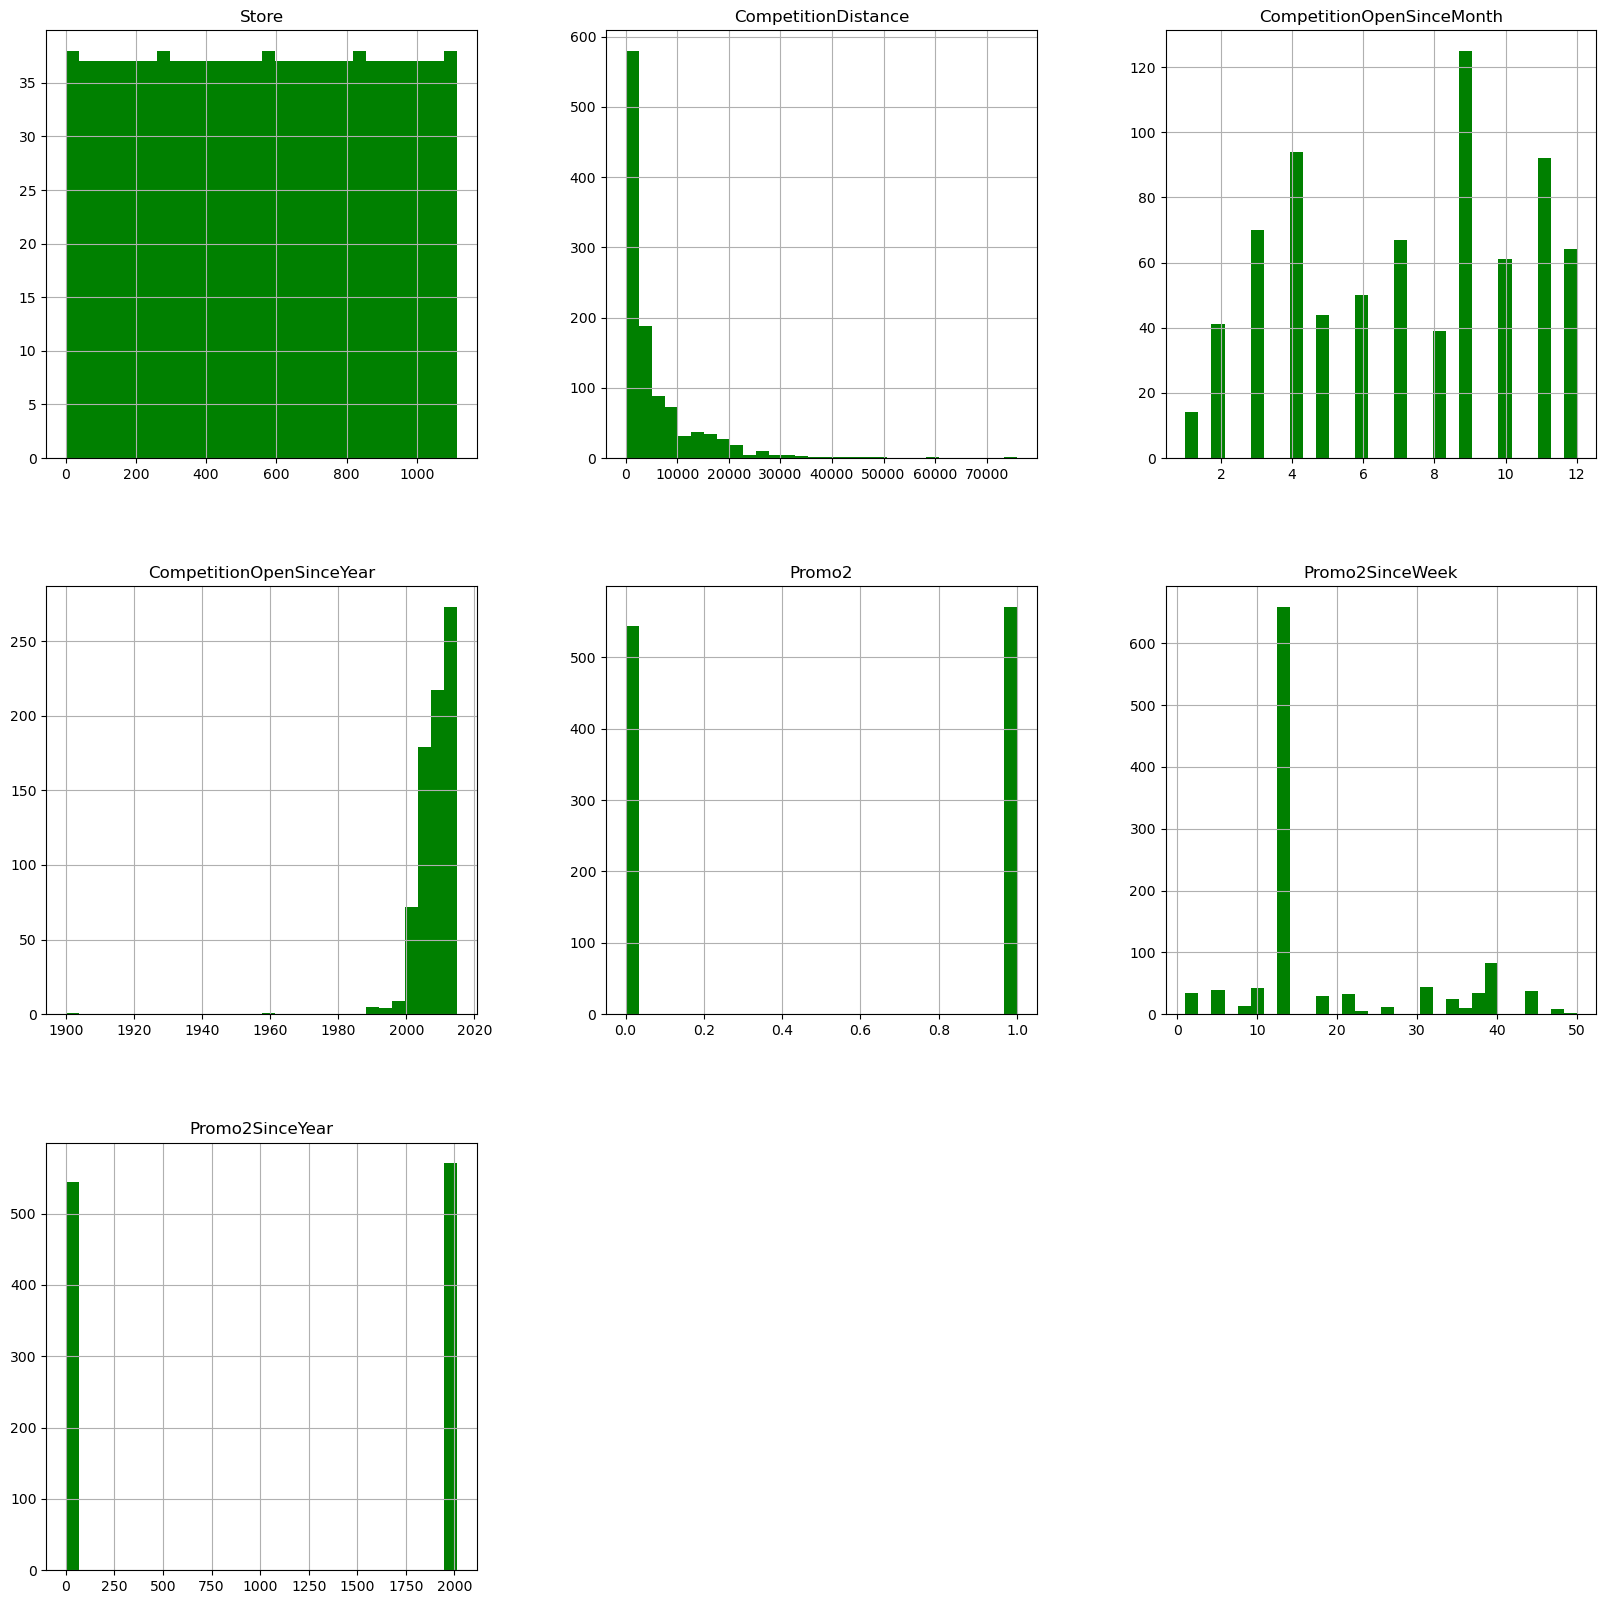

In [21]:
store.hist(bins = 30, figsize = (20, 20), color = 'g');


## Finding outliers at the 99th percentile and removing them.



In [22]:
store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)
store.loc[store.CompetitionOpenSinceYear>store.CompetitionOpenSinceYear.quantile(.99),'CompetitionOpenSinceYear']=store.CompetitionOpenSinceYear.quantile(.99)


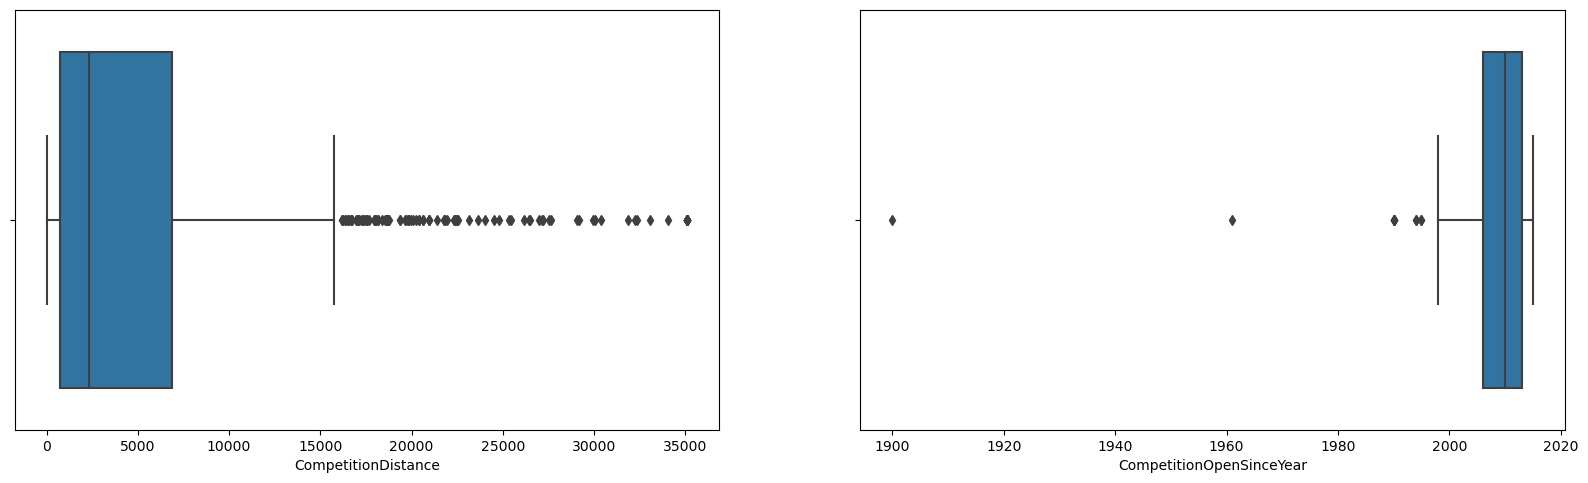

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'CompetitionDistance', data = store)
plt.subplot(2,2,2)
sns.boxplot(x = 'CompetitionOpenSinceYear', data = store)

plt.show()


In [24]:
store['CompetitionOpenSinceYear'].isnull().sum()


354

In [25]:
100*store.isnull().sum()/store.shape[0]


Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

In [28]:
import datetime as dt

store.loc[store['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = dt.datetime.now().year

store.loc[store['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = dt.datetime.now().year

store.loc[store['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = dt.datetime.now().month



In [29]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
df_new = train.merge(store,on=["Store"], how="inner")
print(df_new.shape)
df_new.head()

(844392, 17)


Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      1          4  2015-07-30   5020        546      1            0   
2      1          3  2015-07-29   4782        523      1            0   
3      1          2  2015-07-28   5011        560      1            0   
4      1          1  2015-07-27   6102        612      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0             13.0              0.0             0  
1             13.0              0.0             0  
2             13.0              0.0             0  
3             13.0              0.0             0  
4             13.0              0.0             0

In [31]:
df_new.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [32]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64 

In [34]:
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),
                            "Spring",np.where(df_new["Month"].isin([6,7,8]),
                                              "Summer",np.where(df_new["Month"].isin([9,10,11]),
                                                                "Fall",np.where(df_new["Month"].isin([12,1,2]),
                                                                                "Winter","None"))))


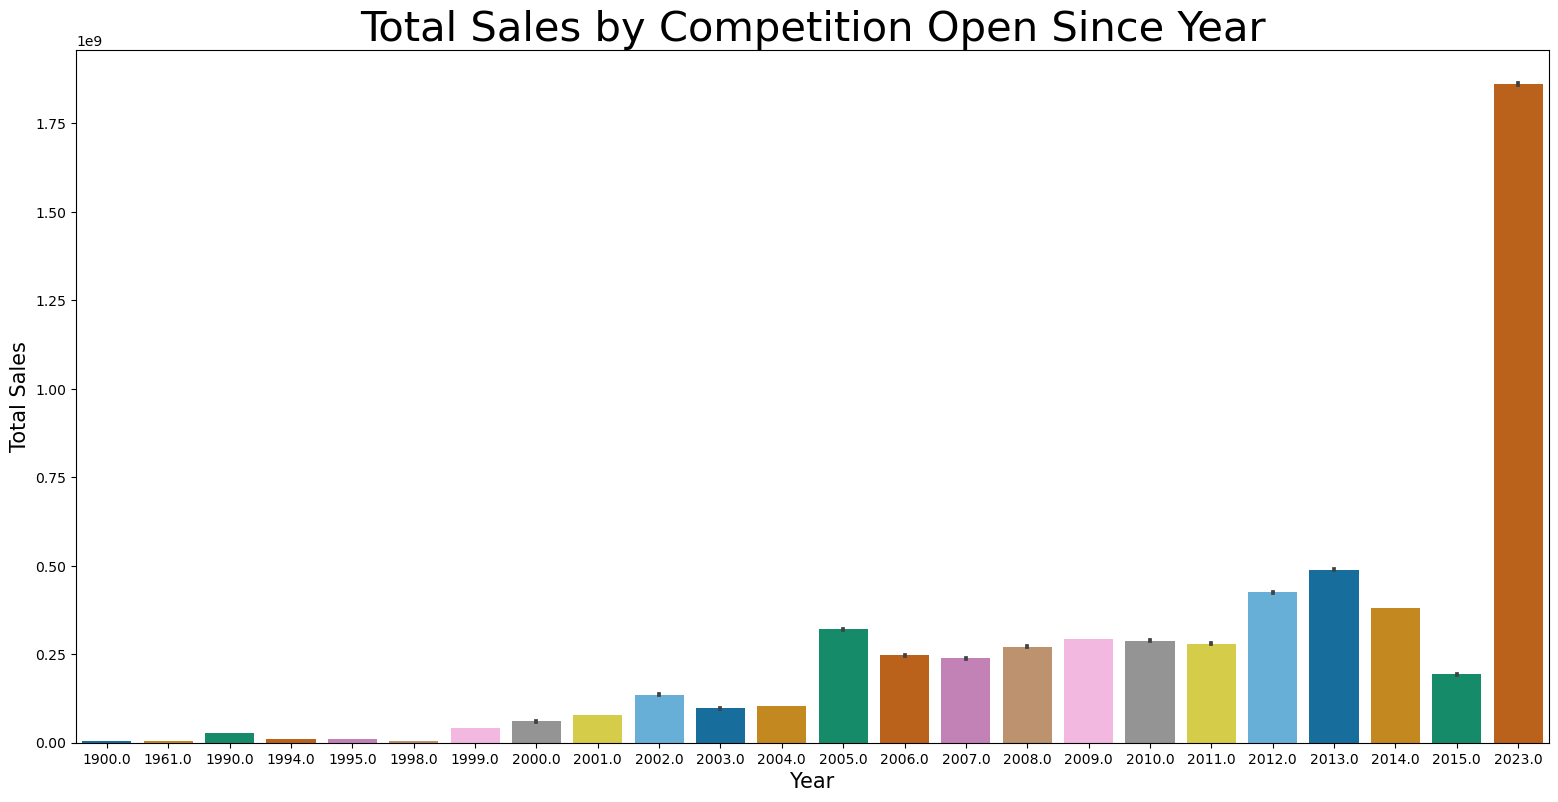

In [35]:

plt.rcParams['figure.figsize'] = (19, 9)
sns.barplot(x=df_new['CompetitionOpenSinceYear'], y=df_new['Sales'], palette = 'colorblind',estimator=sum)
plt.title('Total Sales by Competition Open Since Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

In [36]:
import plotly.express as px
axis = df_new.groupby('Month')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month', markers = True)
fig.show()

In [37]:
axis = df_new.groupby('Day')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day', markers = True)
fig.show()

In [38]:
axis = df_new.groupby('Day')[['Customers']].mean()
fig = px.line(axis, x = axis.index, y = 'Customers', title = 'Average customers per day', markers = True)
fig.show()

In [39]:

axis = df_new.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per day of the week', markers = True)
fig.show()

In [40]:
axis = df_new.groupby('DayOfWeek')[['Customers']].mean()
fig = px.line(axis, x = axis.index, y = 'Customers', title = 'Average customers per day of the week', markers = True)
fig.show()

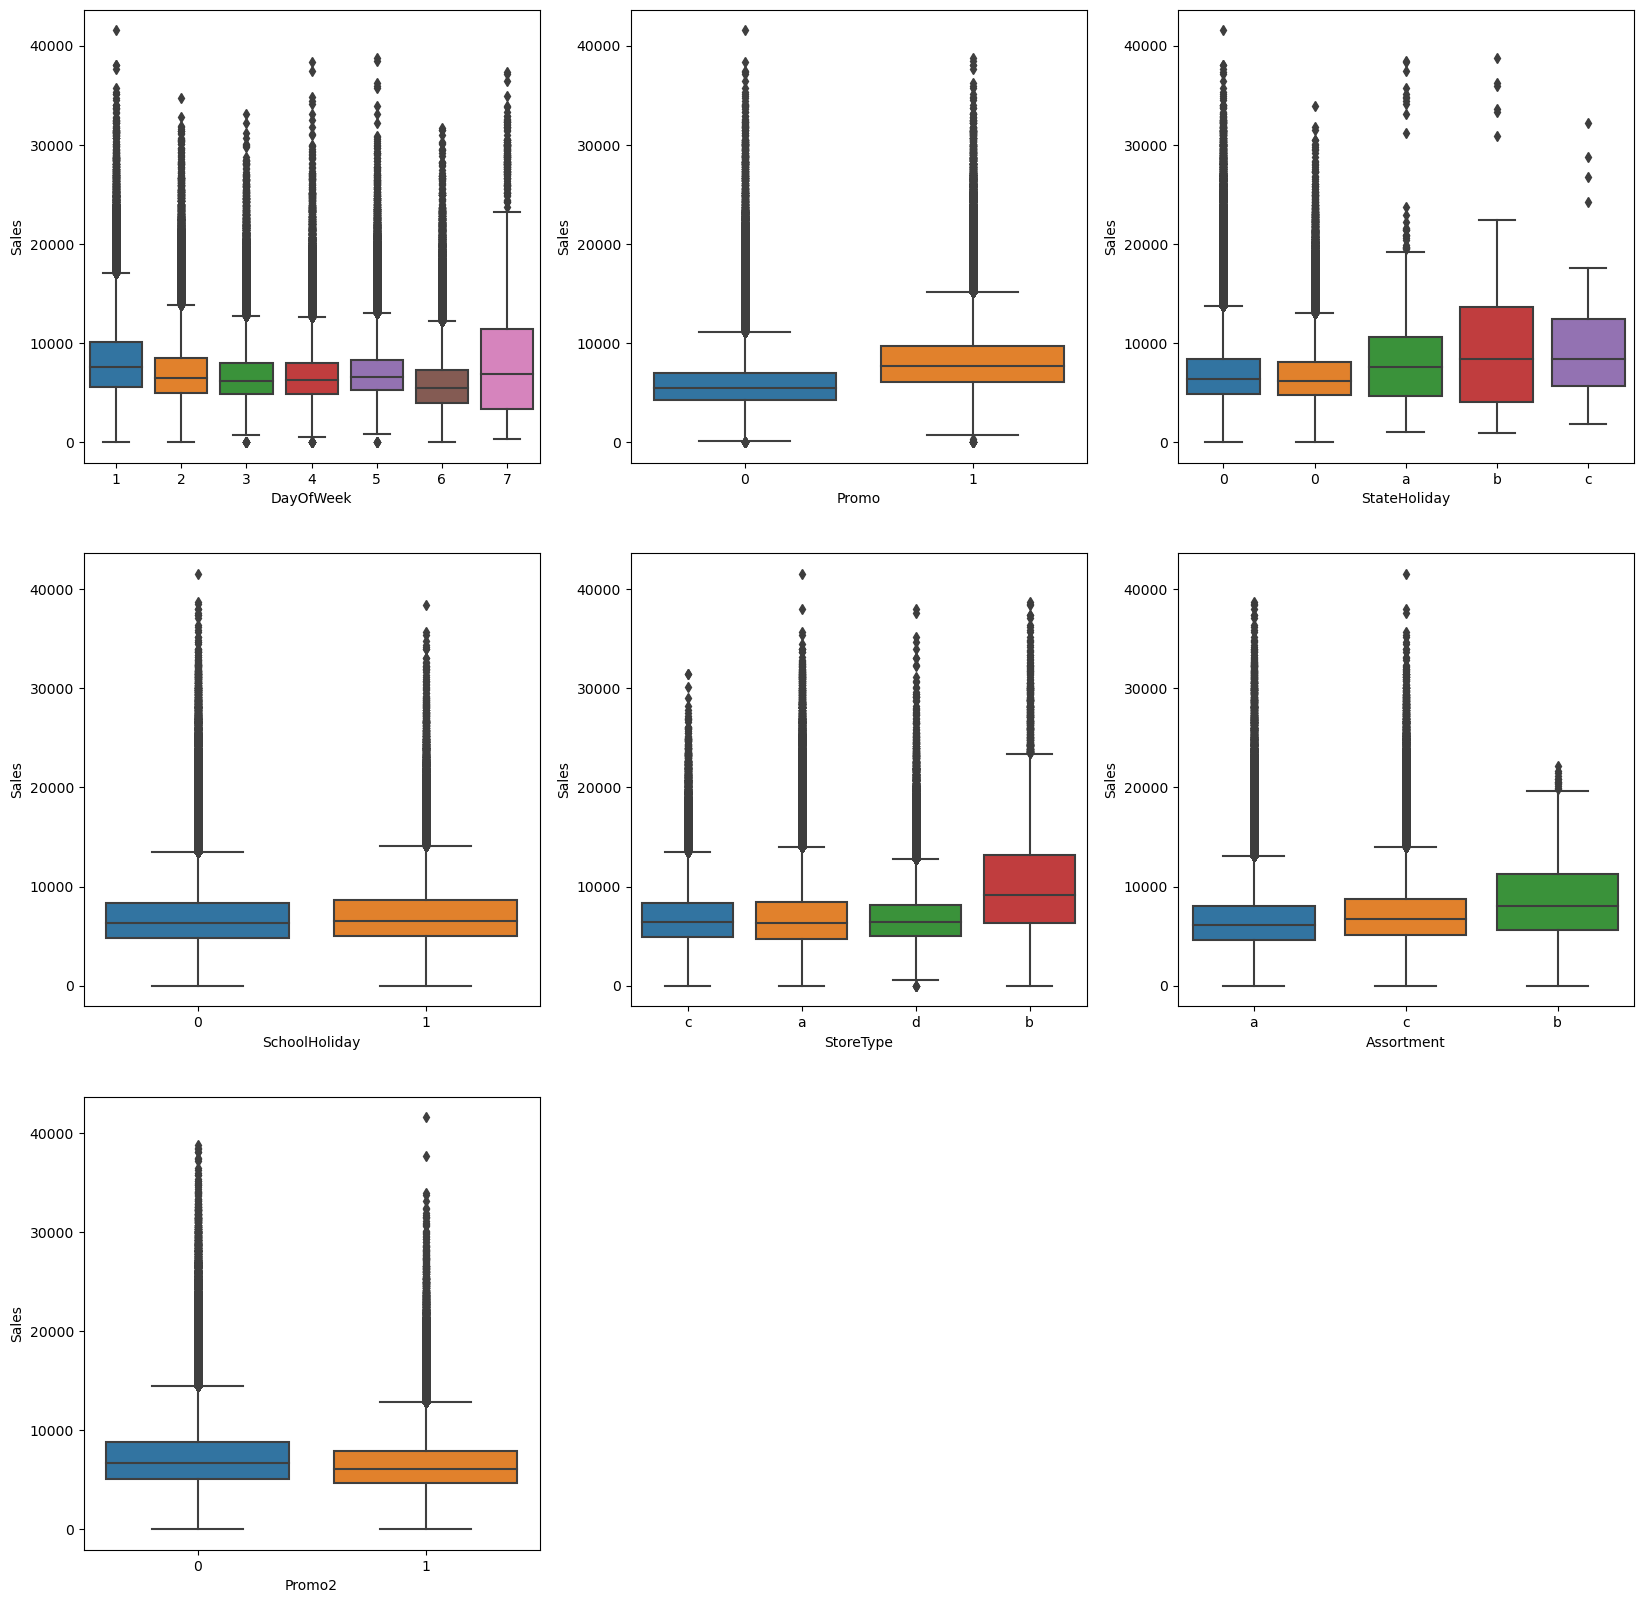

In [41]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = df_new)
plt.subplot(3,3,2)
sns.boxplot(x = 'Promo', y = 'Sales', data = df_new)
plt.subplot(3,3,3)
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = df_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = df_new)
plt.subplot(3,3,5)
sns.boxplot(x = 'StoreType', y = 'Sales', data = df_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'Assortment', y = 'Sales', data = df_new)
plt.subplot(3,3,7)
sns.boxplot(x = 'Promo2', y = 'Sales', data = df_new)
plt.show()

# Inferences on merged Data

- Sales are higher on 1st, 2nd and 5th weekdays and 7th weekday.
- Sales are higher when promotion is 1
- On state holidays, a, b and c, sales are significant when compared to uncategorised
- School holidays do not seem to impact sales
- Store type B has higher % of sales than other store types
- Promo2 does not seem to have much contribution to sales

<AxesSubplot:xlabel='Date'>

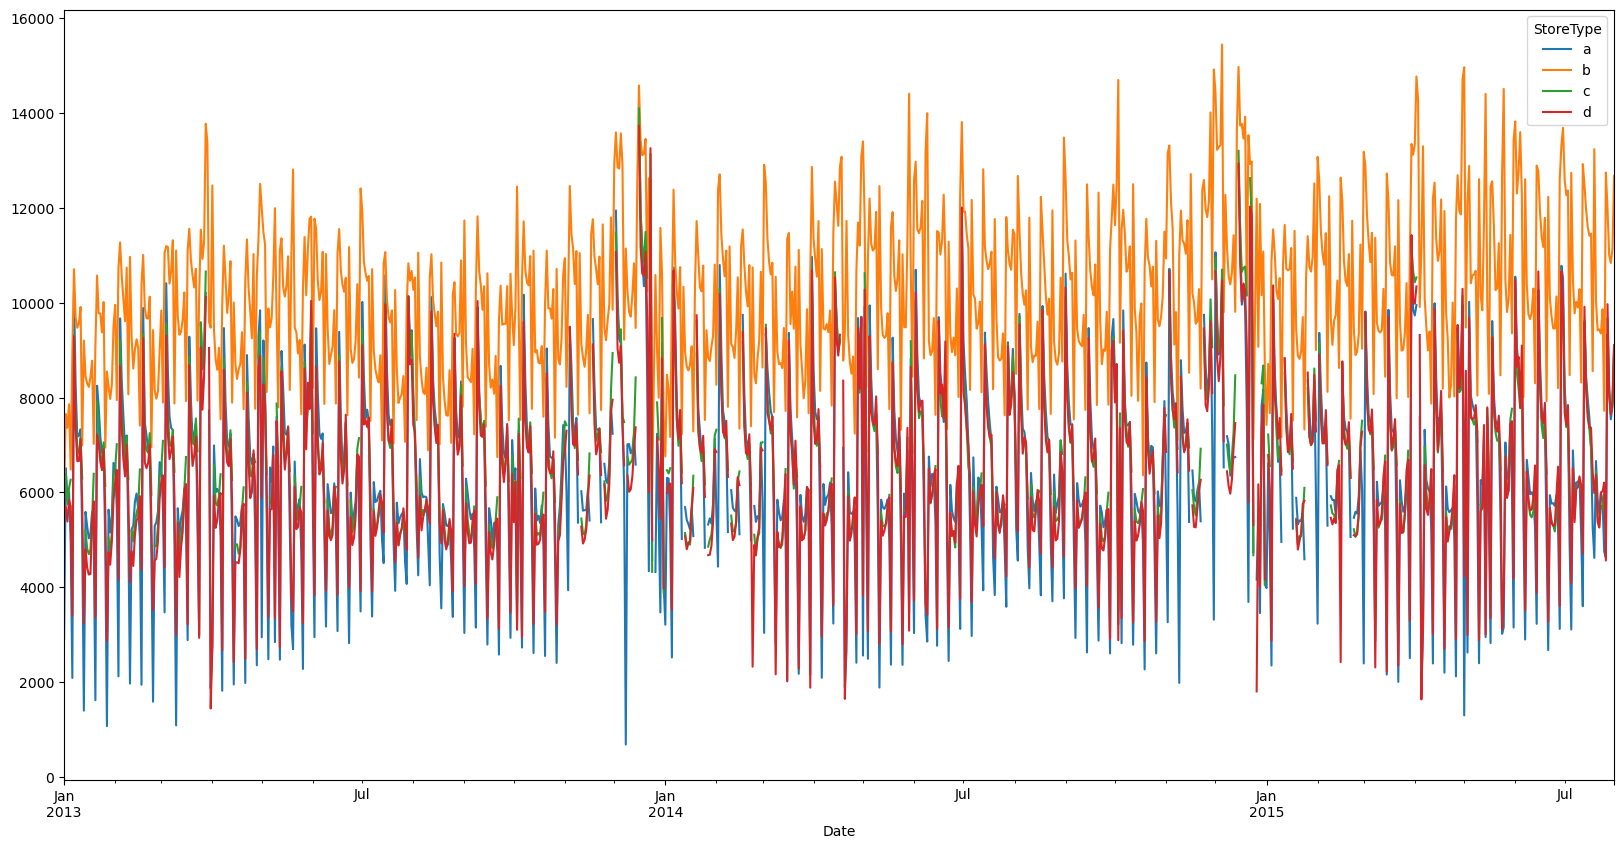

In [42]:
fig, ax = plt.subplots(figsize = (20,10))
df_new.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

> Type b store has the highest average sales, while type a store has the lowest average sales.



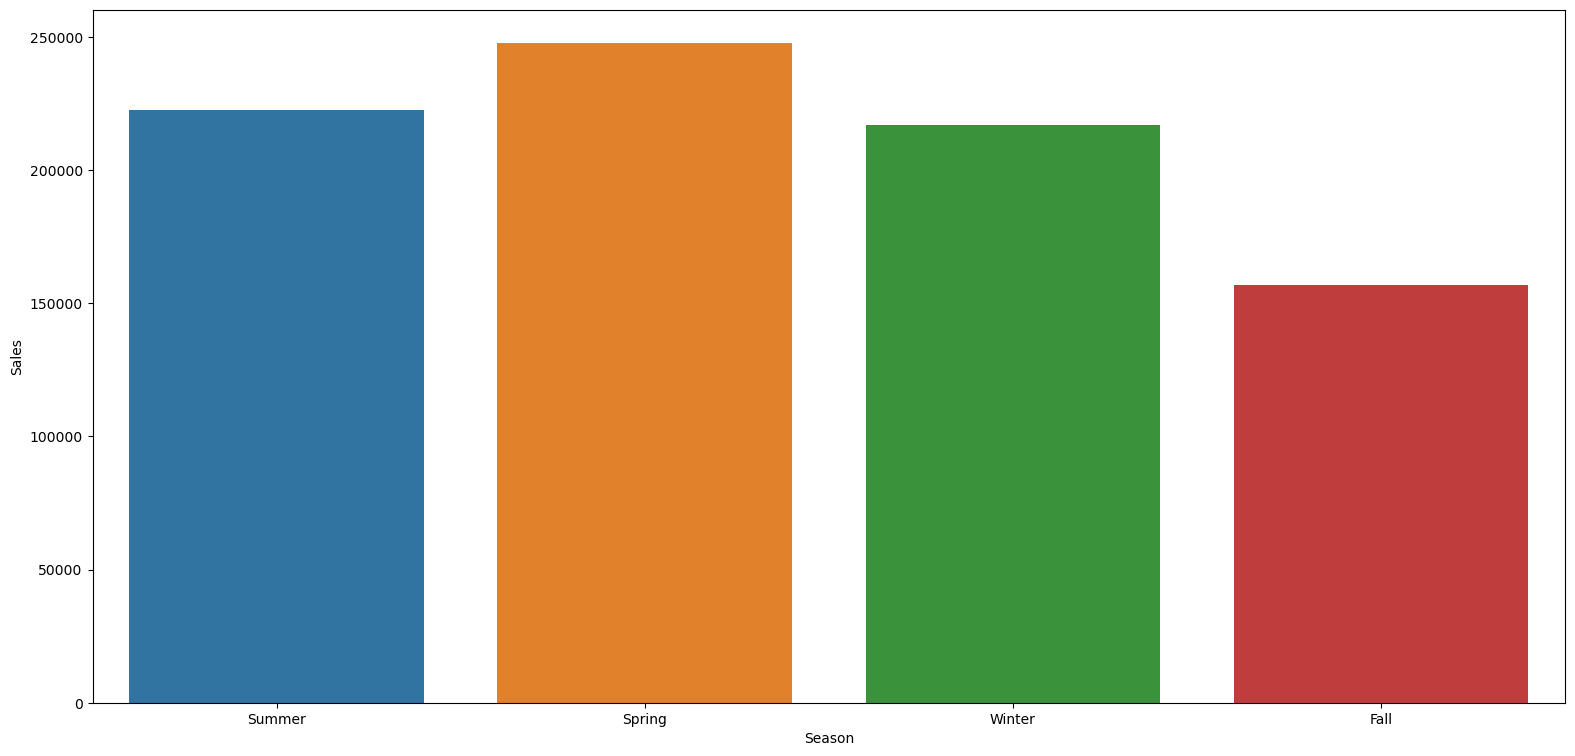

In [43]:
from numpy import count_nonzero

#Count of Sales by Season
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=count_nonzero)


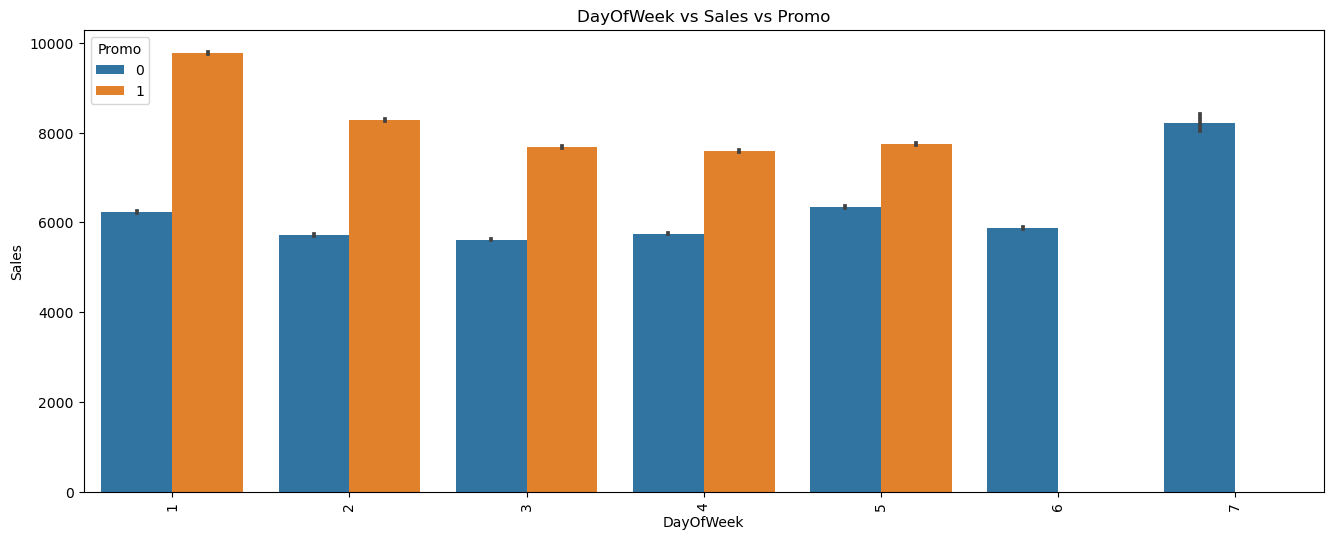

In [44]:
# Checking co-relation between Sales vs Days vs Promo

plt.figure(figsize=(16, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='Promo',data=df_new)
plt.title("DayOfWeek vs Sales vs Promo")
plt.xticks(rotation = 90)
plt.show()

# Promotion has a strong co-relation with sales of the stores.


### For further working of the dataset we will have to take care of the categorical values present in the columns
- Day of the week (7 categories)
- Store type (4 categories)
- Assortment (3 categories)

## Creating Dummy Variables

In [45]:
# Creating dummy variable for day of the week 

dummies=pd.get_dummies(df_new['DayOfWeek'],drop_first=True,prefix='DayOfWeek')
df_new=pd.concat([df_new,dummies],axis=1)

# Creating dummy variable for StoreType 

dummies=pd.get_dummies(df_new['StoreType'],drop_first=True,prefix='StoreType')
df_new=pd.concat([df_new,dummies],axis=1)

# Creating dummy variable for Assortment 

dummies=pd.get_dummies(df_new['Assortment'],drop_first=True,prefix='Assortment')
df_new=pd.concat([df_new,dummies],axis=1)

# Dropping DayOfWeek, StoreType and Assortment

df_new.drop(['DayOfWeek','StoreType','Assortment','Season','Month','Quarter','Year','Day','Week'],axis=1,inplace=True)
df_new.head()

df_new.head()

Store       Date  Sales  Customers  Promo StateHoliday  SchoolHoliday  \
0      1 2015-07-31   5263        555      1            0              1   
1      1 2015-07-30   5020        546      1            0              1   
2      1 2015-07-29   4782        523      1            0              1   
3      1 2015-07-28   5011        560      1            0              1   
4      1 2015-07-27   6102        612      1            0              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   ...  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5 DayOfWeek_6  DayOfWeek_7  \
0  ...            0            0            1           0            0   
1  ...            0            1            0           0            0   
2  ...            1            0            0           0            0   
3  ...            0            0            0           0            0   
4  ...            0            0            0           0            0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  
0            0            1            0             0             0  
1            0            1            0             0             0  
2            0            1            0             0             0  
3            0            1            0             0             0  
4            0            1            0             0             0  

[5 rows x 25 columns]

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  object        
 6   SchoolHoliday              844392 non-null  int64         
 7   CompetitionDistance        844392 non-null  float64       
 8   CompetitionOpenSinceMonth  844392 non-null  float64       
 9   CompetitionOpenSinceYear   844392 non-null  float64       
 10  Promo2                     844392 non-null  int64         
 11  Promo2SinceWeek            844392 non-null  float64 

### We had seen earlier that Promo2 variables does not seem to have much impact on Sales, we can drop them

In [47]:
df_new.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],inplace=True,axis=1)
df_new.head()


Store       Date  Sales  Customers  Promo StateHoliday  SchoolHoliday  \
0      1 2015-07-31   5263        555      1            0              1   
1      1 2015-07-30   5020        546      1            0              1   
2      1 2015-07-29   4782        523      1            0              1   
3      1 2015-07-28   5011        560      1            0              1   
4      1 2015-07-27   6102        612      1            0              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   ...  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  \
0  ...            0            0            1            0            0   
1  ...            0            1            0            0            0   
2  ...            1            0            0            0            0   
3  ...            0            0            0            0            0   
4  ...            0            0            0            0            0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  
0            0            1            0             0             0  
1            0            1            0             0             0  
2            0            1            0             0             0  
3            0            1            0             0             0  
4            0            1            0             0             0  

[5 rows x 21 columns]

# Time series Analysis

In [48]:
#Setting date as index

df_new=df_new.set_index('Date')
df_new.head()

Store  Sales  Customers  Promo StateHoliday  SchoolHoliday  \
Date                                                                     
2015-07-31      1   5263        555      1            0              1   
2015-07-30      1   5020        546      1            0              1   
2015-07-29      1   4782        523      1            0              1   
2015-07-28      1   5011        560      1            0              1   
2015-07-27      1   6102        612      1            0              1   

            CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                         
2015-07-31               1270.0                        9.0   
2015-07-30               1270.0                        9.0   
2015-07-29               1270.0                        9.0   
2015-07-28               1270.0                        9.0   
2015-07-27               1270.0                        9.0   

            CompetitionOpenSinceYear  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  \
Date                                                                          
2015-07-31                    2008.0            0            0            0   
2015-07-30                    2008.0            0            0            1   
2015-07-29                    2008.0            0            1            0   
2015-07-28                    2008.0            1            0            0   
2015-07-27                    2008.0            0            0            0   

            DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  StoreType_b  StoreType_c  \
Date                                                                          
2015-07-31            1            0            0            0            1   
2015-07-30            0            0            0            0            1   
2015-07-29            0            0            0            0            1   
2015-07-28            0            0            0            0            1   
2015-07-27            0            0            0            0            1   

            StoreType_d  Assortment_b  Assortment_c  
Date                                                 
2015-07-31            0             0             0  
2015-07-30            0             0             0  
2015-07-29            0             0             0  
2015-07-28            0             0             0  
2015-07-27            0             0             0

In [49]:
# Grouping the data at a date level for analysis

train_df_all=df_new.groupby('Date').agg({'Sales': 'mean',
                                           'Customers':'mean', 
                                           'Promo': 'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
train_df_all.head()


Sales    Customers  Promo  SchoolHoliday  DayOfWeek_2  \
Date                                                                      
2013-01-01  5719.705882  1146.529412      0             17          1.0   
2013-01-02  6255.471647   750.742574      0           1111          0.0   
2013-01-03  5723.913436   686.239856      0           1034          0.0   
2013-01-04  5991.835740   705.899819      0           1033          0.0   
2013-01-05  5376.326107   621.022584      0            111          0.0   

            DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  
Date                                                                         
2013-01-01          0.0          0.0          0.0          0.0          0.0  
2013-01-02          1.0          0.0          0.0          0.0          0.0  
2013-01-03          0.0          1.0          0.0          0.0          0.0  
2013-01-04          0.0          0.0          1.0          0.0          0.0  
2013-01-05          0.0          0.0          0.0          1.0          0.0

> This Grouping of data with respect to date is done so as to eliminate the error arising whileparcing seasonal decomposition as it cannot handle negative values(Multiplicative), or series with frequency set to none.

In [50]:
train_df_all.shape

(942, 10)

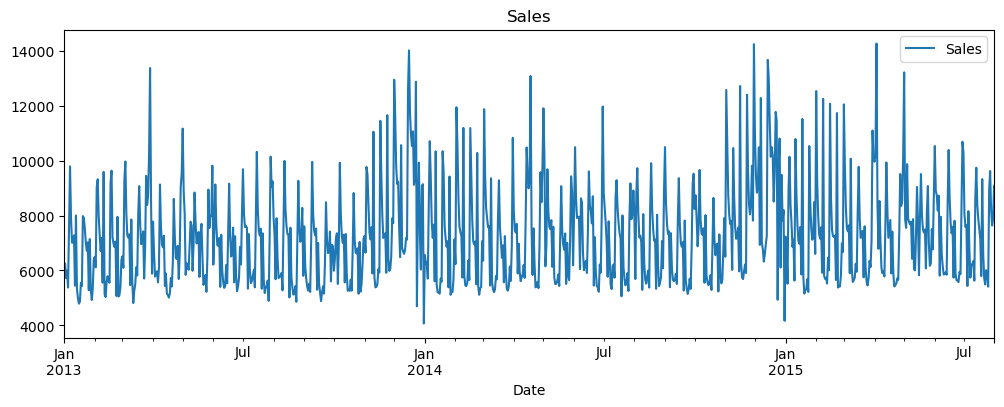

In [51]:
train_df_all.Sales.plot(figsize=(12, 4),)
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

## Time series Decomposition


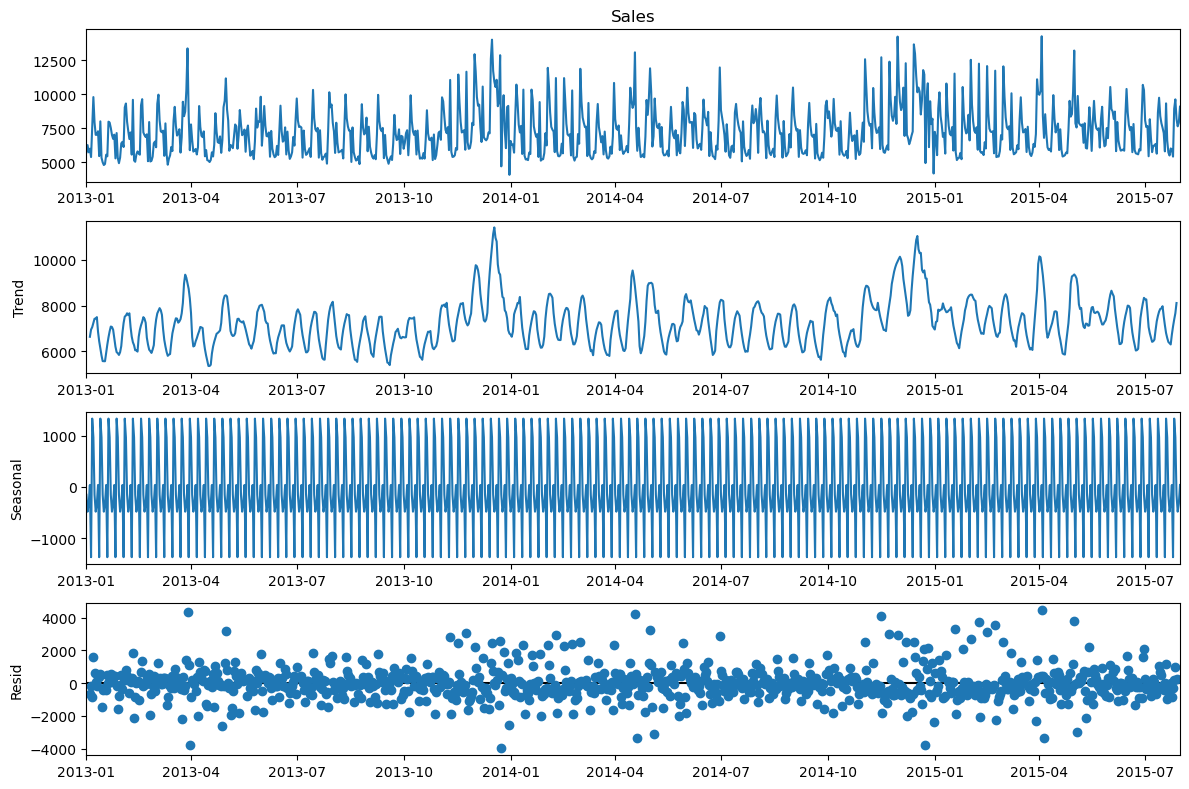

Mean Residual for Sales=0.022727168971407162


In [52]:
from pylab import rcParams
import statsmodels.api as sm
def plot_seasonal_decomposition(series,c,model):
    rcParams['figure.figsize'] = 12, 8
    decomposition = sm.tsa.seasonal_decompose(series, model=model) 
    fig = decomposition.plot()
    plt.show()
    print('Mean Residual for {}={}'.format(c,decomposition.resid.mean()))
plot_seasonal_decomposition(train_df_all['Sales'],'Sales','additive')



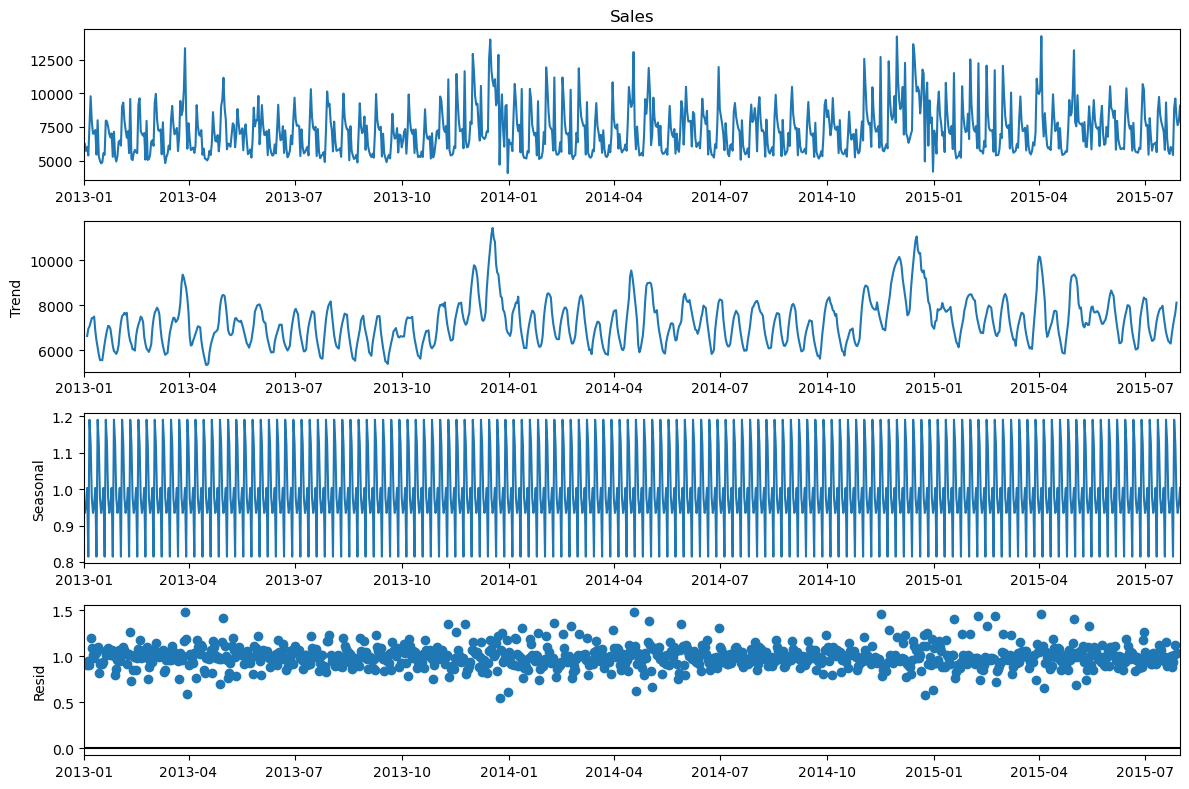

Mean Residual for Sales=0.9959706663748941


In [53]:

plot_seasonal_decomposition(train_df_all['Sales'],'Sales','multiplicative')


# Running some stationarity tests

### Augmented Dickey-Fuller (ADF) test

In [54]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss


def Stationarity_test_adf(df):
    for i in df.columns:
        print('Test for :', i)
        print('\n')
        test= adfuller(df[i])
        print('ADF Statistic=',test[0])
        print('P value=',test[1]) 
        print('Critical Values @ 0.05: %.2f' % test[4]['5%'])

        p_value= round(test[1], 4)
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
            print('\n')
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  
            
            
def Stationarity_test_kpss(df):
    for i in df.columns:
        print('Test for :', i)
        print('\n')
        test= kpss(df[i])
        print('KPSS Statistic=',test[0])
        print('P value=',test[1])
        print('Critical Values @ 0.05: %.2f' % test[3]['5%'])

        p_value= round(test[1], 4)
        if p_value >= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
            print('\n')
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")
            print('\n')

In [55]:
Stationarity_test_adf(train_df_all[['Sales','Customers']])


Test for : Sales


ADF Statistic= -5.415363665993012
P value= 3.144408733805583e-06
Critical Values @ 0.05: -2.86
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


Test for : Customers


ADF Statistic= -4.9419094437352875
P value= 2.8882887928469665e-05
Critical Values @ 0.05: -2.86
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




> The p-values for both the variables is less than 0.05. We can reject the null hypothesis. The series is stationary
In the dataset, we do not have any other variable which is linearly related to Sales. They do not seem to be time series inputs for our analysis.

##  Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [57]:
Stationarity_test_kpss(train_df_all[['Sales','Customers']])

Test for : Sales


KPSS Statistic= 1.0177254126226747
P value= 0.01
Critical Values @ 0.05: 0.46
 => P-Value = 0.01. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


Test for : Customers


KPSS Statistic= 0.3883914526234611
P value= 0.0821588566278185
Critical Values @ 0.05: 0.46
 => P-Value = 0.0822. Rejecting Null Hypothesis.
 => Series is Stationary.




/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




## Seems like the sales data is not stationary for Sales as it can be seen in the kpss test

> Even if the customer column was not stationary we could have let it slide, but our model has to predict values for sales thus we can leave no margin for error to get the best possible results.

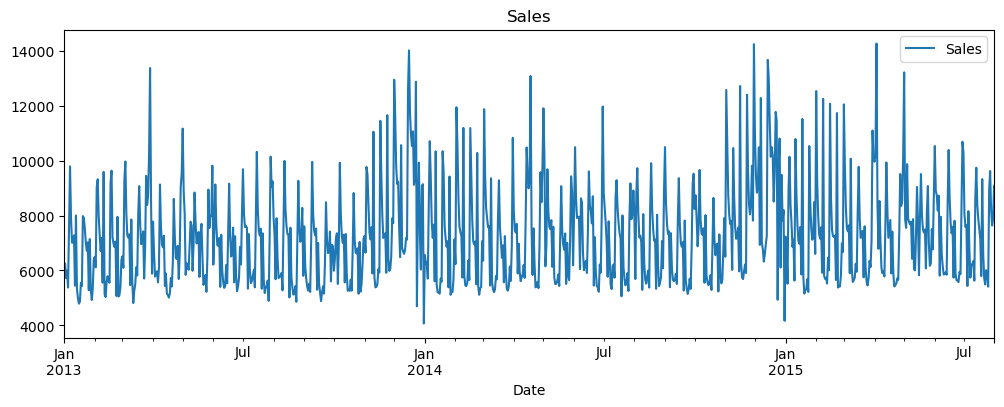

In [58]:
train_df_all['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

#### Herre we can see that the series is not in the middle of the y axis, it is slightly downwards.
Although the data seems to be revolving aroung a common mean but a slight variace can be seen.

# Box Cox Transformation : To remove variance in the data

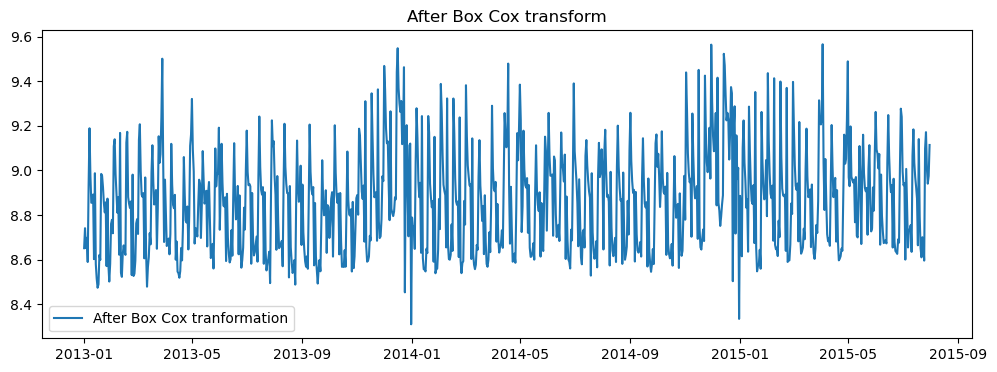

In [59]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(train_df_all['Sales'], lmbda=0), index = train_df_all.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

## Applying first order Differencing

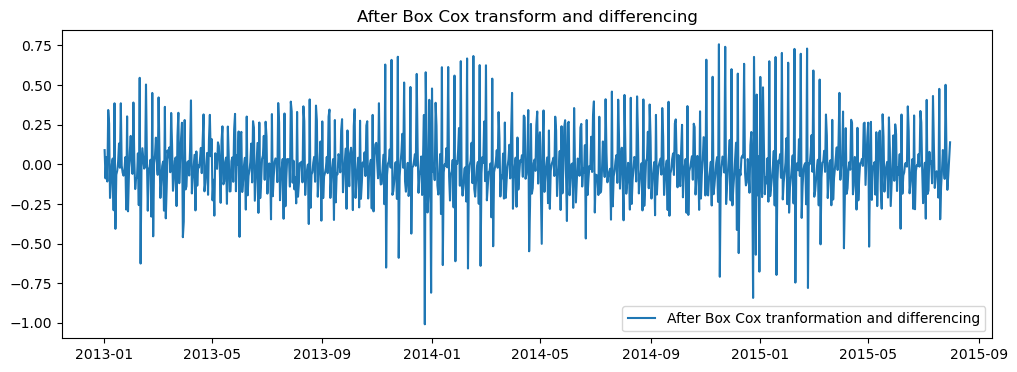

In [60]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), train_df_all.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

> Now the data seems to be hovering around a common mean range.

    Dropping the Na/Infinite values to run stationarity tests.

In [61]:
data_boxcox_diff.dropna(inplace=True)

## Running stationarity tests

# ADF

In [62]:
test= adfuller(data_boxcox_diff)
p_value = test[1]
if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
            print('\n')
else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  
            print('\n')


 => P-Value = 1.4697026658328871e-21. Rejecting Null Hypothesis.
 => Series is Stationary.




# KPSS

In [63]:
test= kpss(data_boxcox_diff)
p_value = test[1]
if p_value >= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
            print('\n')
else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")  
            print('\n')

 => P-Value = 0.1. Rejecting Null Hypothesis.
 => Series is Stationary.




/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# Now we can say that the series is stationary.

> We had earlier determined that since increase in customers relate to increased sales and since no other variable is a time series, we will consider them to be exogenous.

# Autocorelation


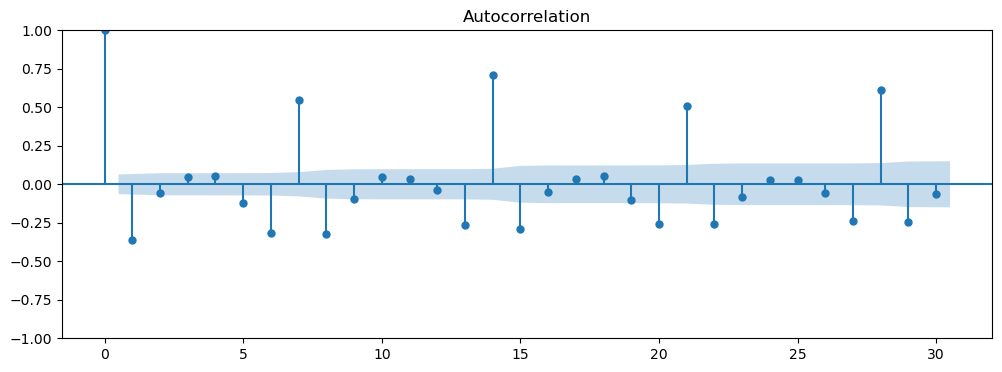

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))

plot_acf(data_boxcox_diff, ax= plt.gca(), lags=30)
plt.show()

# Partial Autocorrelation

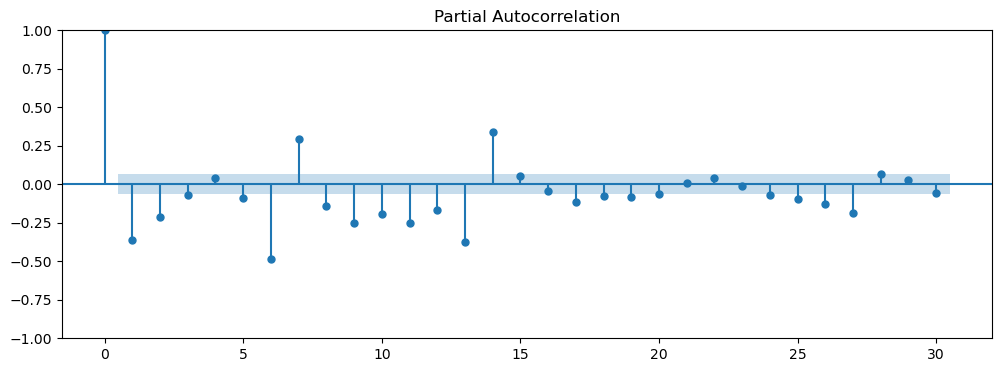

In [65]:
plt.figure(figsize=(12,4))

plot_pacf(data_boxcox_diff, ax= plt.gca(), lags=30)
plt.show()

# Train - Test Split

### We need to predict sales for the next 6 weeks i.e 42 days. So, we keep 42 days for test and remaining for training.



In [66]:
train_len = 900
train = train_df_all[0:train_len] 
test = train_df_all[train_len:]
print(test.shape)
print(train.shape)

(42, 10)
(900, 10)


In [67]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [68]:
print(train_data_boxcox_diff.shape)
print(test_data_boxcox_diff.shape)
print(test_data_boxcox.shape)
print(train_data_boxcox.shape)


(899,)
(42,)
(42,)
(900,)


# ARIMA

In [69]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox, order=(3, 1, 5))
model_fit = model.fit()
print(model_fit.params)

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ar.L1    -0.147495
ar.L2    -0.852101
ar.L3     0.290199
ma.L1    -0.411690
ma.L2     0.842160
ma.L3    -1.066006
ma.L4     0.088810
ma.L5    -0.451254
sigma2    0.030204
dtype: float64


/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [70]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox_diff'])

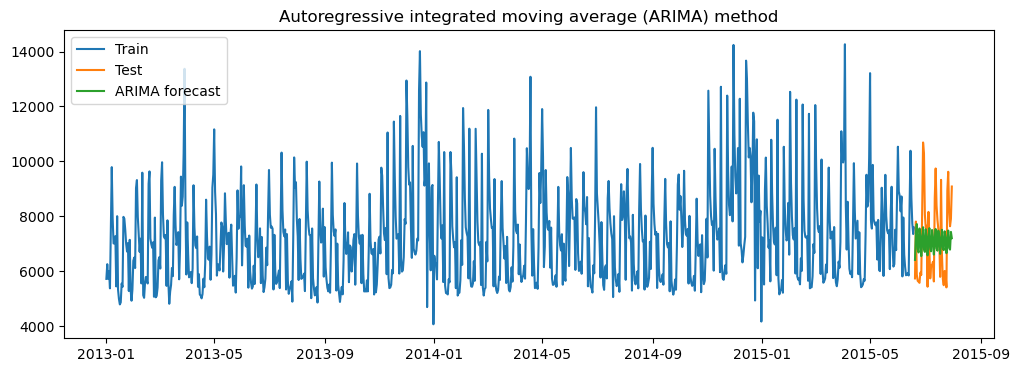

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

## As we can see the plotting done for the ARIMA Forecast. 
-This is due to the reason that the values obtained by the function lack seasonality :
 
- we will now calculate RMSE and MAPE values.

In [73]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

Results = pd.DataFrame({'Method':['    ARIMA '], 'RMSE': [rmse],'MAPE': [mape] })
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0      ARIMA   1422.89  17.05

## As we can see that the ARIMA model was not able to capture the prediction with seasonality, We will try adding some seasonality to it.

# SARIMA

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(3, 1, 5), seasonal_order=(3, 1, 5, 12)) 
model_fit = model.fit()
print(model_fit.params)

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65857D-02    |proj g|=  1.30984D+00

At iterate    5    f= -1.89288D-01    |proj g|=  3.84138D-01

At iterate   10    f= -2.50219D-01    |proj g|=  5.46561D-02

At iterate   15    f= -2.91837D-01    |proj g|=  3.55129D-01

At iterate   20    f= -3.10917D-01    |proj g|=  3.64242D-02

At iterate   25    f= -3.22769D-01    |proj g|=  1.07128D-01

At iterate   30    f= -3.26254D-01    |proj g|=  3.82255D-02

At iterate   35    f= -3.27132D-01    |proj g|=  3.41407D-02

At iterate   40    f= -3.28794D-01    |proj g|=  7.31068D-02

At iterate   45    f= -3.29045D-01    |proj g|=  5.01182D-02


/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f= -3.29901D-01    |proj g|=  3.83946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     54      1     0     0   3.839D-02  -3.299D-01
  F = -0.32990059044954084     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ar.L1      -0.265139
ar.L2      -0.899885
ar.L3       0.175868
ma.L1      -0.234305
ma.L2       0.729593
ma.L3      -0.940483
ma.L4      -0.077168
ma.L5      -0.463002
ar.S.L12   -0.832331
ar.S.L24    0.046623
ar.S.L36    0.282717
ma.S.L12    0.088509
ma.S.L24   -1.068539
ma.S.L36   -0.521587
ma.S.L48    0.354097
ma.S.L60    0.190004
sigma2      0.028471
dtyp

In [77]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

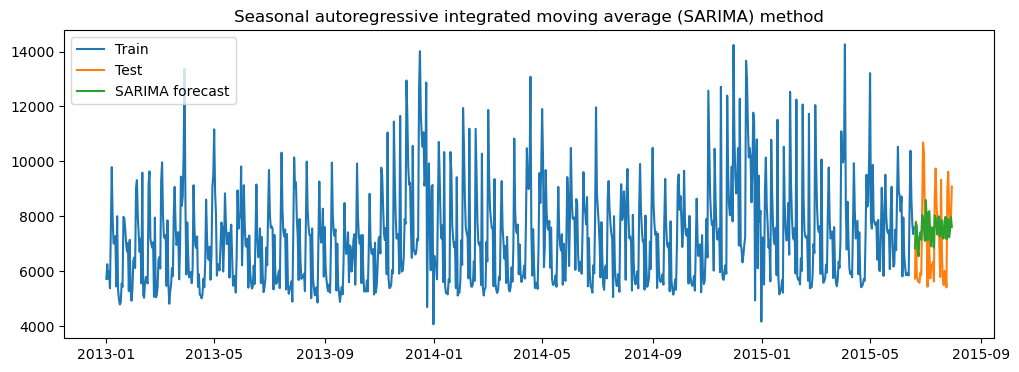

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA '], 'RMSE': [rmse],'MAPE': [mape] })
Results = pd.concat([Results, tempResults])
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0      ARIMA   1422.89  17.05
0     SARIMA   1359.17  17.49

### A little improvement , lets see how the predictions occur under the influence of exogenous variables.

# SARIMAX

In [80]:
model = SARIMAX(train_data_boxcox, order=(3, 1, 5), seasonal_order=(3, 1, 5, 12), exog= train.Promo) 
model_fit = model.fit()
print(model_fit.params)

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.37755D-02    |proj g|=  9.85147D+01


 This problem is unconstrained.



At iterate    5    f= -7.61786D-02    |proj g|=  1.55833D+01

At iterate   10    f= -8.71688D-02    |proj g|=  2.33660D+02

At iterate   15    f= -1.51082D-01    |proj g|=  1.02954D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     16     32      1     0     0   1.017D+00  -1.511D-01
  F = -0.15108208115886815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Promo       0.000192
ar.L1      -0.490037
ar.L2      -0.707376
ar.L3      -0.111977
ma.L1       0.101300
ma.L2       0.196502
ma.L3      -0.286855
ma.L4      -0.284708
ma.L5      -0.001394
ar.S.L12   -0.663374
ar.S.L24   -0.310268
ar.S.L36   -0.187746
ma.S.L12   -0.220261
ma.S.L24   -0.377620
ma.S.L36   -0.175025
ma.S.L48   -0.149954
ma.S.L60    0.002462
sigma2      0.040441
dtype: float64


In [82]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=test.Promo)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

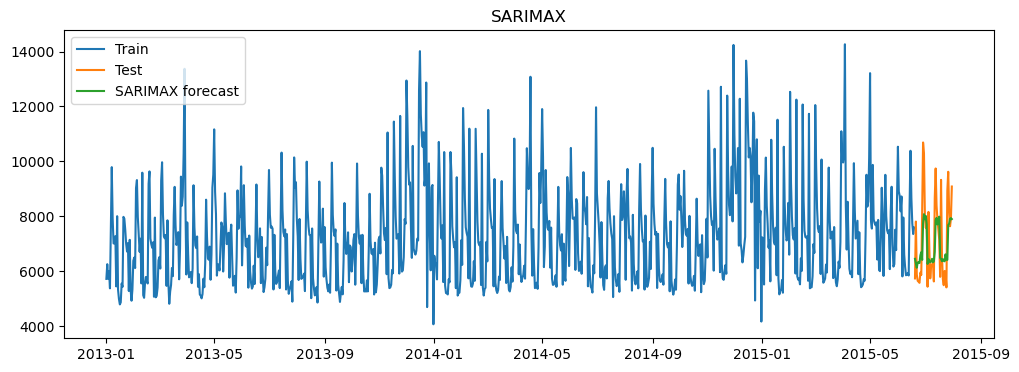

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [84]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX(Promo) '], 'RMSE': [rmse],'MAPE': [mape] })
Results = pd.concat([Results, tempResults])
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0           ARIMA   1422.89  17.05
0          SARIMA   1359.17  17.49
0  SARIMAX(Promo)   1186.75  11.83

# Now the model has started to catch some prediction just like the plot of the data.


### let us try with another exogenous variable

In [85]:
model = SARIMAX(train_data_boxcox, order=(3, 1, 5), seasonal_order=(3, 1, 5, 12), exog= train.SchoolHoliday) 
model_fit = model.fit()
print(model_fit.params)

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.51306D-02    |proj g|=  3.99785D+01


 This problem is unconstrained.



At iterate    5    f= -4.61154D-02    |proj g|=  1.32974D+00

At iterate   10    f= -4.62986D-02    |proj g|=  1.82337D+01

At iterate   15    f= -7.00530D-02    |proj g|=  1.70507D+02

At iterate   20    f= -9.87762D-02    |proj g|=  2.73247D-01

At iterate   25    f= -1.00807D-01    |proj g|=  3.69362D+01

At iterate   30    f= -1.51421D-01    |proj g|=  8.83486D+01

At iterate   35    f= -1.65588D-01    |proj g|=  2.98330D-01

At iterate   40    f= -1.66759D-01    |proj g|=  1.07466D+01

At iterate   45    f= -1.94816D-01    |proj g|=  4.80367D+01


/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f= -1.98999D-01    |proj g|=  9.95958D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     63      1     0     0   9.960D+00  -1.990D-01
  F = -0.19899898449048820     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
SchoolHoliday   -0.000048
ar.L1           -0.538785
ar.L2           -0.861598
ar.L3           -0.225856
ma.L1            0.037309
ma.L2            0.456546
ma.L3           -0.418142
ma.L4           -0.093888
ma.L5           -0.334114
ar.S.L12        -0.655166
ar.S.L24        -0.295952
ar.S.L36        -0.198626
ma.S.L12        -0.191307
ma.S.L24        -0.5005

In [86]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=test.SchoolHoliday)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

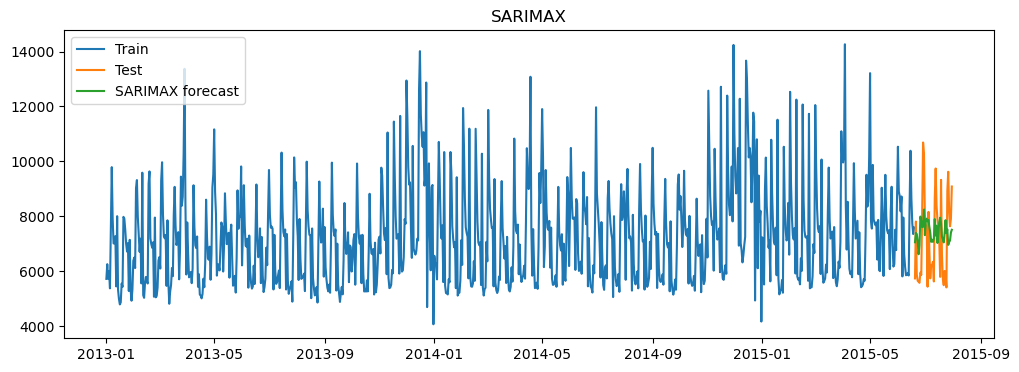

In [87]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX(SchoolHoliday) '], 'RMSE': [rmse],'MAPE': [mape] })
Results = pd.concat([Results, tempResults])
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0                   ARIMA   1422.89  17.05
0                  SARIMA   1359.17  17.49
0          SARIMAX(Promo)   1186.75  11.83
0  SARIMAX(SchoolHoliday)   1453.15  18.55

> The result is not that fruitful. Although the model is catching the features but it would be better if both the exogenous variables could be used togeather.

# VAR [Vector AutoRegressive Model]


In [89]:
exog = train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())



 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        23.43       23.53   1.502e+10       23.47
1        23.18       23.30   1.164e+10       23.22
2        23.14       23.29   1.126e+10       23.20
3        23.13       23.29   1.109e+10       23.19
4        23.10       23.29   1.081e+10       23.17
5        23.07       23.28   1.049e+10       23.15
6        23.08       23.31   1.056e+10       23.17
7        22.95       23.20   9.264e+09       23.04
8        22.88      23.15*   8.607e+09       22.98
9        22.86       23.15   8.457e+09       22.97
10       22.85       23.16   8.361e+09       22.97
11       22.84       23.18   8.320e+09       22.97
12       22.84       23.19   8.276e+09       22.97
13       22.83       23.21   8.232e+09       22.98
14       22.79       23.19   7.894e+09       22.94
15      22.74*       23.16  7.534e+09*      22.90*
-------------------------------

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [90]:
var_model_final = var_model.fit(14)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Mar, 2023
Time:                     22:16:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    23.1867
Nobs:                     886.000    HQIC:                   22.9397
Log likelihood:          -12534.9    FPE:                7.87499e+09
AIC:                      22.7869    Det(Omega_mle):     7.25628e+09
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const              3129.050680       484.121936            6.463           0.000
Promo                 0.846138         0.137393            6.159           0.000
SchoolHoliday        -0.068398         0.135306           -0

In [91]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [92]:
train_df_all['Sales']=train_df_all['Sales'].apply(lambda x:round(x))
train_df_all['Customers']=train_df_all['Customers'].apply(lambda x:round(x))

In [93]:
cointegration_test(train_df_all[['Sales','Customers']],10)
rank_result=select_coint_rank(train_df_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  110.23    > 12.3212   =>   True
Customers ::  0.38      > 4.1296    =>   False


In [94]:
print(rank_result.rank)



1


In [95]:
lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = train[['Sales','Customers']].values[-lag_order:]
forecast_input

14


array([[ 5810.33004484,   641.07533632],
       [ 7954.45454545,  1377.57575758],
       [ 6606.97847534,   745.05829596],
       [ 6157.83856502,   700.9309417 ],
       [ 5851.78565022,   675.232287  ],
       [ 5877.20269058,   687.04573991],
       [ 5930.36894075,   686.89497307],
       [ 5844.04039497,   633.07001795],
       [ 8422.90625   ,  1414.71875   ],
       [10386.08617594,   951.00987433],
       [ 8650.58078995,   842.49640934],
       [ 7736.51526032,   780.6481149 ],
       [ 7353.10412926,   754.12746858],
       [ 7592.68581688,   781.66337522]])

In [96]:
exog_test = test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=test.index, columns=['Sales','Customers'])
var_forecast.head()

Sales    Customers
Date                                
2015-06-20  6094.651642   696.072483
2015-06-21  8239.855966  1445.036363
2015-06-22  7389.653594   937.766278
2015-06-23  6260.402807   785.809797
2015-06-24  5831.184642   735.124885

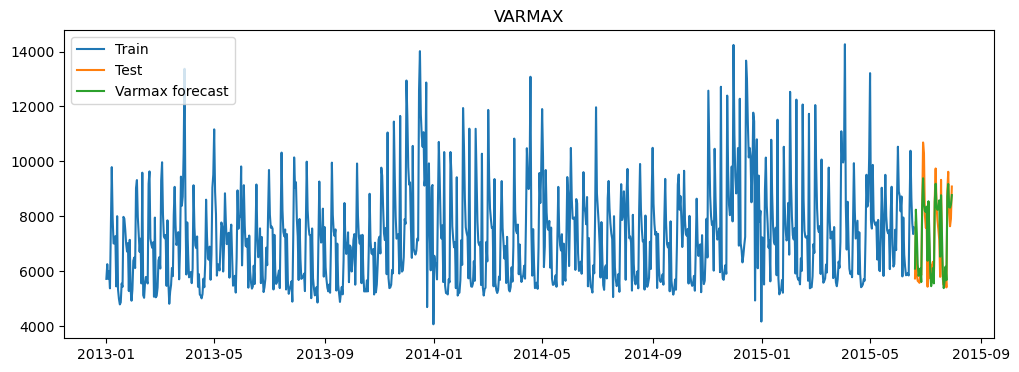

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(var_forecast['Sales'][test.index.min():], label='Varmax forecast')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [98]:
rmse = np.sqrt(mean_squared_error(test['Sales'], var_forecast['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-var_forecast['Sales'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VAR'], 'RMSE': [rmse],'MAPE': [mape] })
Results = pd.concat([Results, tempResults])
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0                   ARIMA   1422.89  17.05
0                  SARIMA   1359.17  17.49
0          SARIMAX(Promo)   1186.75  11.83
0  SARIMAX(SchoolHoliday)   1453.15  18.55
0                  VARMAX    646.66   7.11

## Forecasting using VARMAX

In [100]:
#modelling

exog = train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = train[['Sales', 'Customers']].astype(float)
varmax_model = sm.tsa.VARMAX(endog, order=(3,5),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(3,5)   Log Likelihood              -12903.218
                              + intercept   AIC                          25912.436
Date:                    Mon, 27 Mar 2023   BIC                          26166.963
Time:                            22:35:34   HQIC                         26009.667
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             6.91, 0.01   Jarque-Bera (JB):       476.08, 876.45
Prob(Q):                        0.01, 0.92   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.50, 1.26   Skew:                       0.43, 1.05
P

In [103]:
#forecasting on test data

exog_test = test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=test.index.min(),end=test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=test.index, columns=['Sales','Customers'])
varmax_forecast.head()

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/Users/iraiva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



Sales    Customers
Date                                
2015-06-20  6317.331362   771.910472
2015-06-21  8829.929577  1533.018913
2015-06-22  7657.576343   924.880098
2015-06-23  5695.689371   721.173546
2015-06-24  5107.076132   665.647108

In [104]:
#Adding forecasted values

test['VarmaxForecastedSales']=varmax_forecast.Sales
test['VarmaxForecastedCustomers']=varmax_forecast.Customers

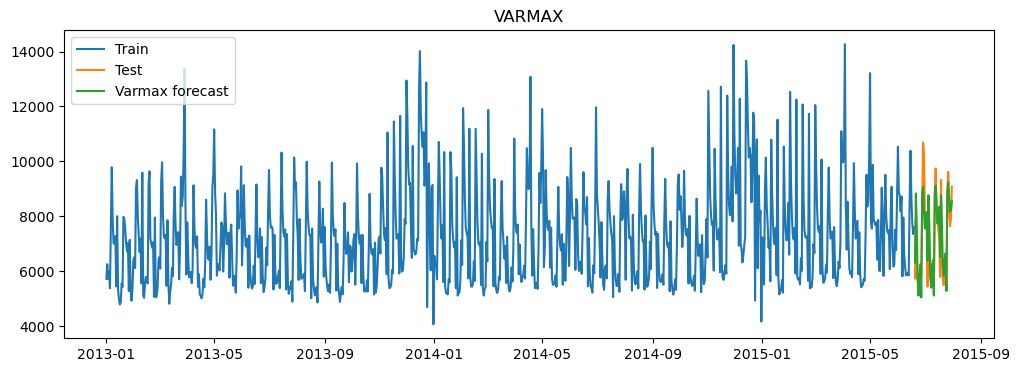

In [105]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(varmax_forecast['Sales'][test.index.min():], label='Varmax forecast')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [106]:
rmse = np.sqrt(mean_squared_error(test['Sales'], varmax_forecast['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-varmax_forecast['Sales'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'], 'RMSE': [rmse],'MAPE': [mape] })
Results = pd.concat([Results, tempResults])
Results = Results[['Method', 'RMSE', 'MAPE']]
Results

Method     RMSE   MAPE
0                   ARIMA   1422.89  17.05
0                  SARIMA   1359.17  17.49
0          SARIMAX(Promo)   1186.75  11.83
0  SARIMAX(SchoolHoliday)   1453.15  18.55
0                  VARMAX    646.66   7.11
0                   VARMAX   740.53   8.18